### Imports necesarios y carga de datos

In [324]:
from sklearn.datasets import make_regression
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib notebook
from matplotlib import pyplot as plt
import scipy.stats as scp

In [325]:
#Crearemos la función load_dataset y cargaremos del dataset de Abalone abriendo el fitxer abalone.csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

dataset = load_dataset('../data/abalone.csv')


# APARTADO C

### Analisis de datos

In [326]:
print("Primeros 5 valores de la base de datos:")
dataset.head()

Primeros 5 valores de la base de datos:


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [327]:
print("Dimensiones de la base de datos:")
print(dataset.shape)

Dimensiones de la base de datos:
(4177, 9)


In [328]:
print("Numero de valores null:")
print(dataset.isnull().sum())

Numero de valores null:
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64


In [329]:
#Llamaremos a la función describe para ver si hay inconsistencias en los datos
print("Estadisticas sobre los atributos de la base de datos:")
dataset.describe()

Estadisticas sobre los atributos de la base de datos:


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [330]:
#Como podemos ver detectamos ciertas inconsistencias en la altura, pues es imposible que sea 0, para ver cuales
#tienen como valor 0, haremos una consulta para conocer sus indices
print("Muestras con altura en 0:")
dataset[dataset['Height'] == 0]


Muestras con altura en 0:


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


In [331]:
#Una vez conocidos los indices con valor 0, los eliminaremos de la base de datos
dataset.drop(index=[1257,3996], inplace = True)

In [332]:
#Confirmamos que se han eliminado haciendo otra vez la consulta:
print("Dimensiones base de datos")
print(dataset.shape)
print("Muestras con altura 0")
dataset[dataset['Height'] == 0]


Dimensiones base de datos
(4175, 9)
Muestras con altura 0


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings


In [333]:
#El enunciado nos dice que la edad es igual al numero de anillos + 1,5
dataset['age'] = dataset.Rings + 1.5

In [334]:
print("Mostramos otra vez los 5 primeros valores para ver que el nuevo atributo llamado age se ha añadido correctamente")
dataset.head()

Mostramos otra vez los 5 primeros valores para ver que el nuevo atributo llamado age se ha añadido correctamente


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


In [335]:
#Cambiamos el nombre a las variables para evitar problemas con los espacios y las mayusculas.
dataset.rename(columns={"Sex":"sex","Length":"length","Diameter":"diameter","Height":"height","Whole weight":"whole_weight",
              "Shucked weight":"shucked_weight","Viscera weight":"viscera_weight","Shell weight":"shell_weight",
                       "Rings":"rings"}, inplace = True)

In [336]:
print("Mostramos otra vez los 5 primeros valores para ver que se han renombrado correctamente")
dataset.head()

Mostramos otra vez los 5 primeros valores para ver que se han renombrado correctamente


,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


### Relación entre variables

<IPython.core.display.Javascript object>


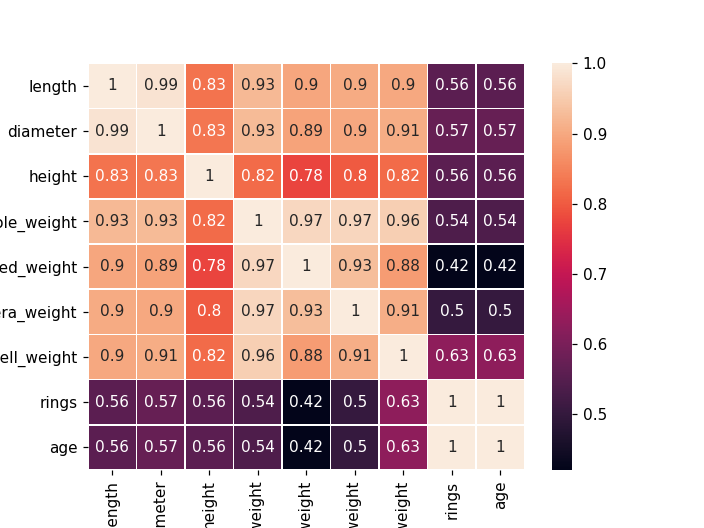

In [337]:
tablaCorrelaciones = dataset.corr()
plt.figure()

ax2 = sns.heatmap(tablaCorrelaciones, annot=True, linewidths=.5)

<IPython.core.display.Javascript object>


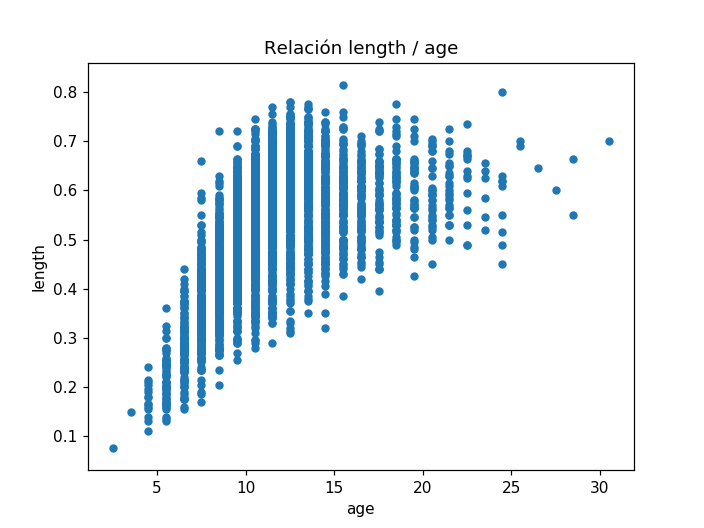

In [338]:
dataset.plot(kind='scatter', x='age', y='length', title='Relación length / age')

<IPython.core.display.Javascript object>


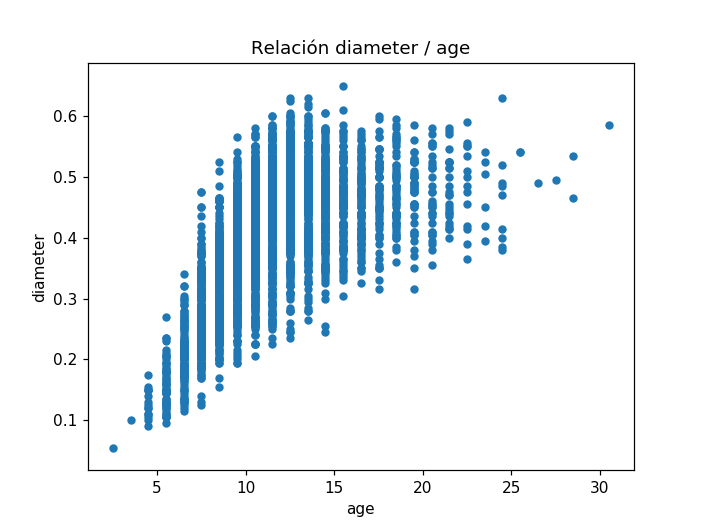

In [339]:
dataset.plot(kind='scatter', x='age', y='diameter', title='Relación diameter / age')

<IPython.core.display.Javascript object>


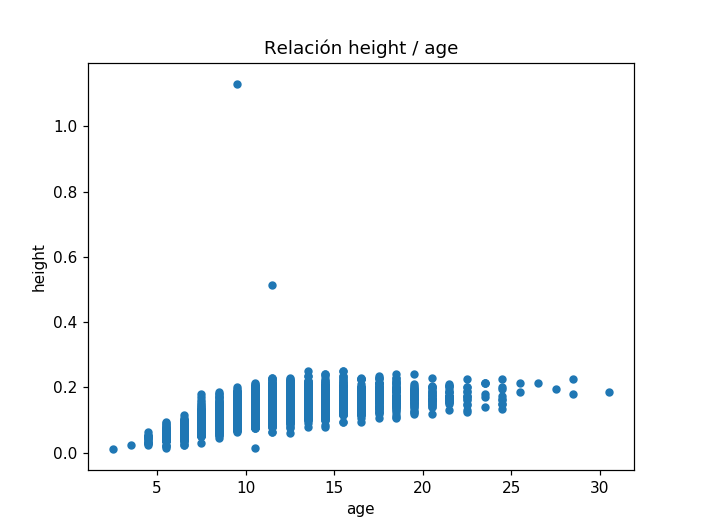

In [340]:
dataset.plot(kind='scatter', x='age', y='height', title='Relación height / age')

<IPython.core.display.Javascript object>


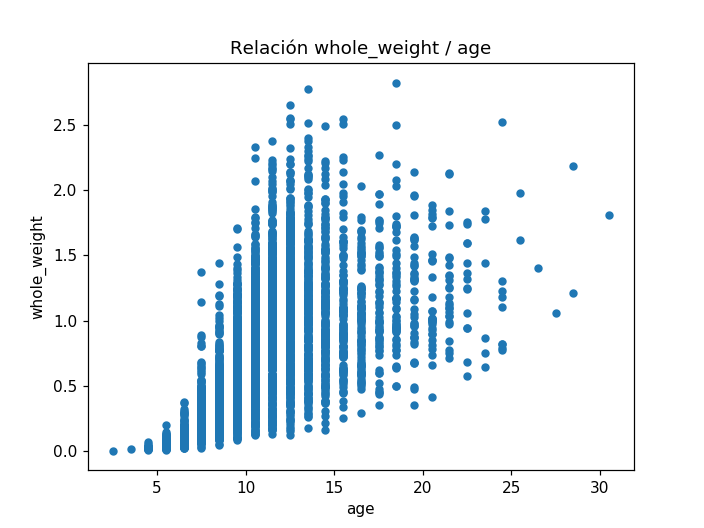

In [341]:
dataset.plot(kind='scatter', x='age', y='whole_weight', title='Relación whole_weight / age')

<IPython.core.display.Javascript object>


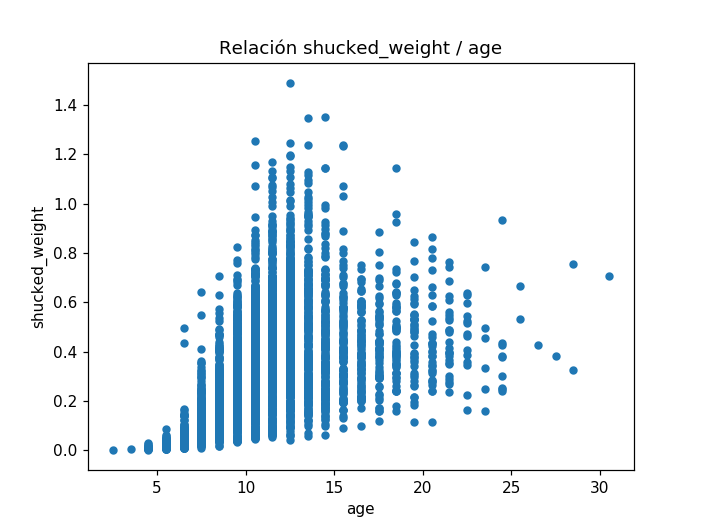

In [342]:
dataset.plot(kind='scatter', x='age', y='shucked_weight', title='Relación shucked_weight / age')

<IPython.core.display.Javascript object>


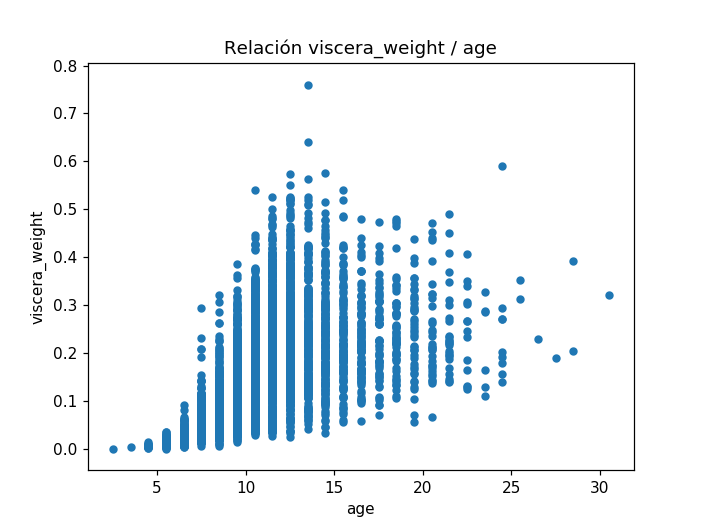

In [343]:
dataset.plot(kind='scatter', x='age', y='viscera_weight', title='Relación viscera_weight / age')

<IPython.core.display.Javascript object>


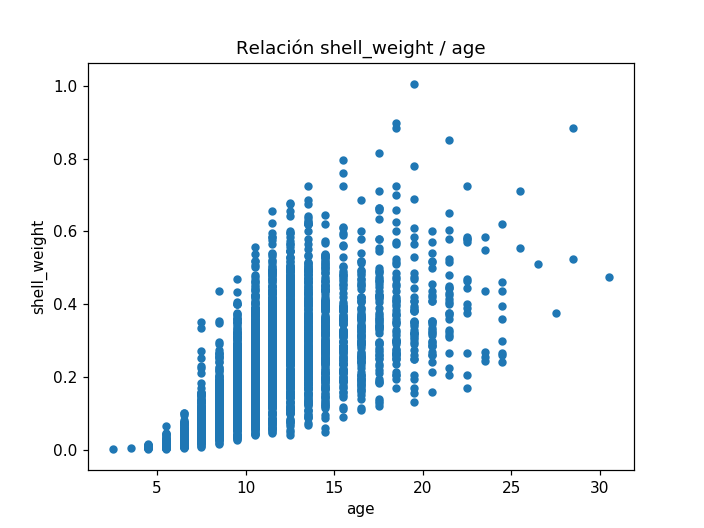

In [344]:
dataset.plot(kind='scatter', x='age', y='shell_weight', title='Relación shell_weight / age')

<IPython.core.display.Javascript object>


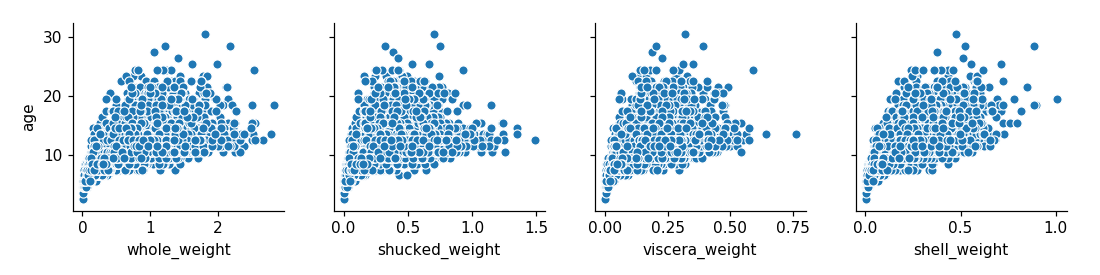

In [345]:
sns.pairplot(dataset, y_vars=['age'], x_vars=['whole_weight', 'shucked_weight', 'viscera_weight','shell_weight'])

<IPython.core.display.Javascript object>


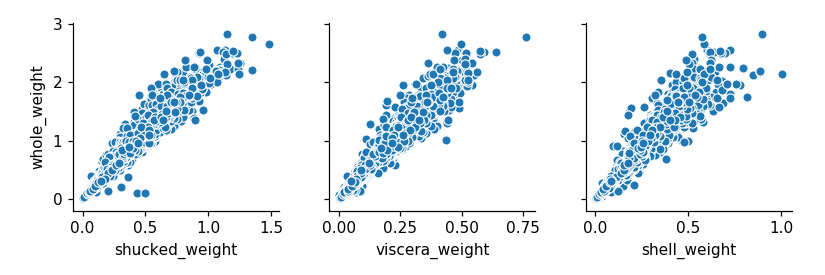

In [346]:
sns.pairplot(dataset, y_vars=['whole_weight'], x_vars=['shucked_weight', 'viscera_weight','shell_weight'])

<IPython.core.display.Javascript object>


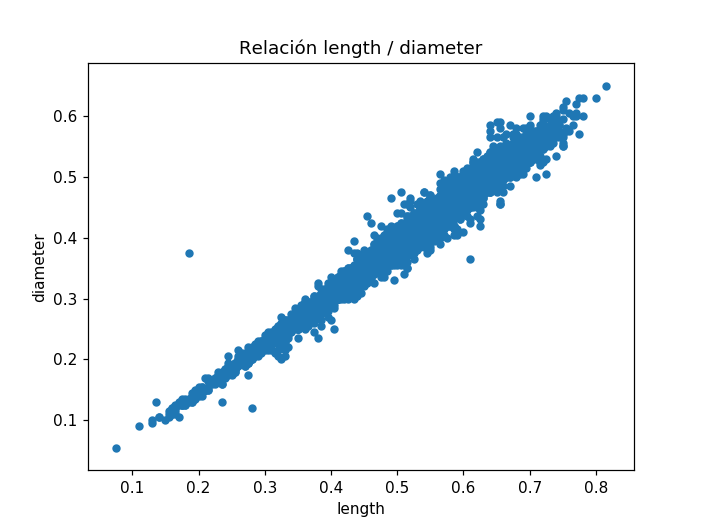

In [347]:
dataset.plot(kind='scatter', x='length', y='diameter', title='Relación length / diameter')

### Distribución Gaussiana de los atributos

<IPython.core.display.Javascript object>


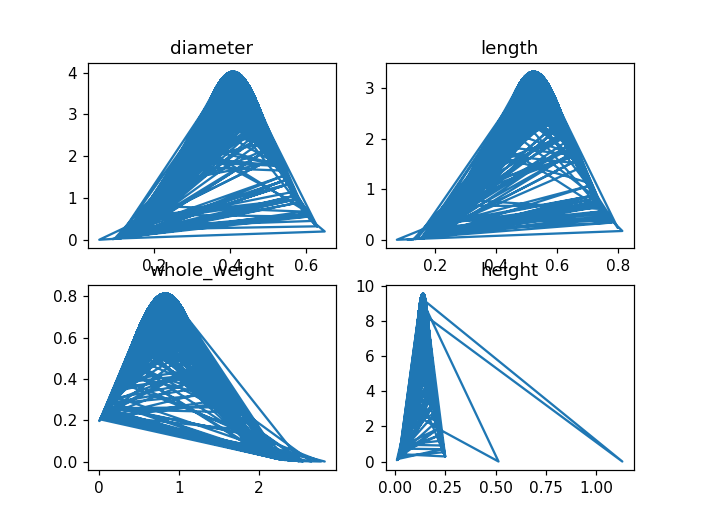

In [348]:
figure, axis = plt.subplots(2, 2)
def drawGaus(variable,X,Y):
    media = dataset[variable].mean() 
    sd = dataset[variable].std()
    axis[X,Y].plot(dataset[variable], scp.norm.pdf(dataset[variable], media, sd)) 
    axis[X,Y].set_title(variable)
drawGaus('diameter',0,0)
drawGaus('length',0,1)
drawGaus('whole_weight',1,0)
drawGaus('height',1,1)

In [349]:
#nos damos cuenta de que hay 2 outliers muy claros.
dataset[dataset['height']>0.4]

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,age
1417,M,0.705,0.565,0.515,2.210,1.1075,0.4865,0.5120,10,11.5
2051,F,0.455,0.355,1.130,0.594,0.3320,0.1160,0.1335,8,9.5


In [350]:
#los eliminamos
dataset.drop(index=[1417,2051], inplace = True)

<IPython.core.display.Javascript object>


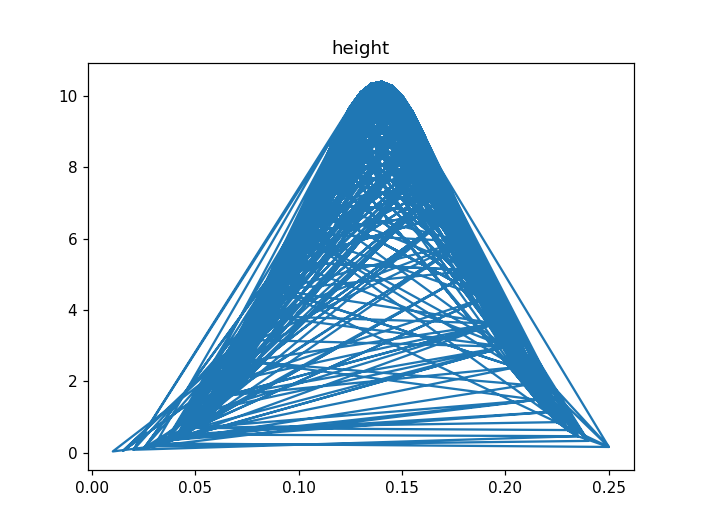

In [351]:
#comprobamos que ya no estan.
plt.figure()
variable = 'height'
media = dataset[variable].mean() 
sd = dataset[variable].std() 
  
plt.plot(dataset[variable], scp.norm.pdf(dataset[variable], media, sd)) 
plt.title(variable)
plt.show() 

### Comparación del sexo con otros atributos

<IPython.core.display.Javascript object>


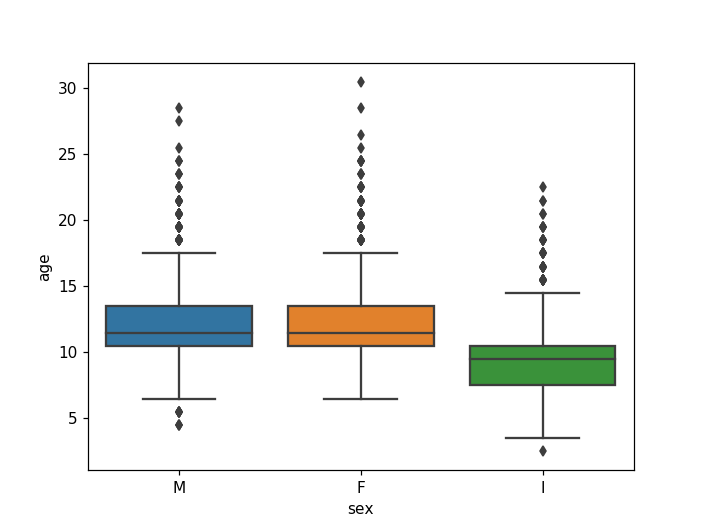

In [352]:
#Comparamos el sexo con los diferentes atributos.
plt.figure()
ax = sns.boxplot(x="sex", y="age", data=dataset)

<IPython.core.display.Javascript object>


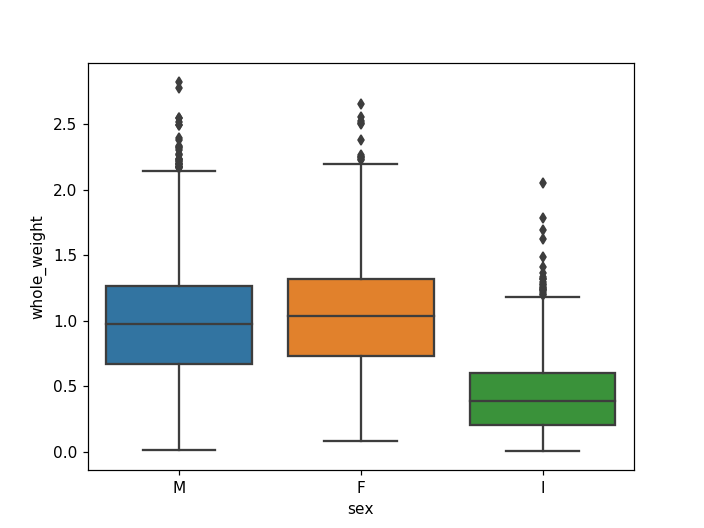

In [353]:
#Comparamos el sexo con los diferentes atributos.
plt.figure()
ax = sns.boxplot(x="sex", y="whole_weight", data=dataset)

<IPython.core.display.Javascript object>


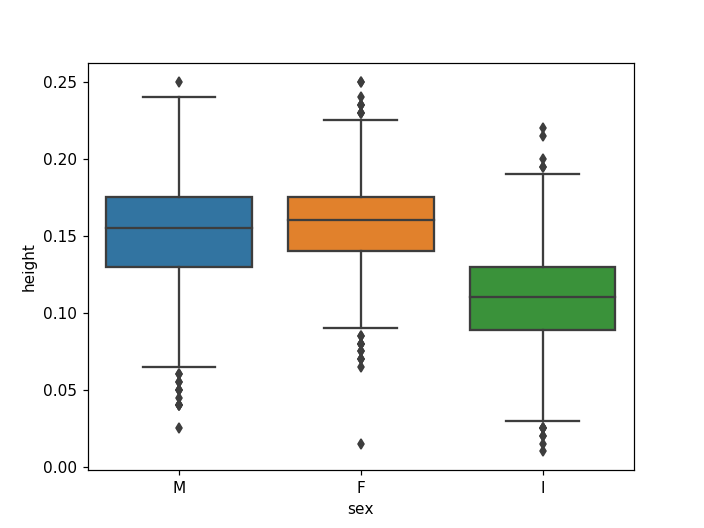

In [354]:
#Comparamos el sexo con los diferentes atributos.
plt.figure()
ax = sns.boxplot(x="sex", y="height", data=dataset)

### Eliminamos las columnas innecesarias

# APARTADO B